In [1]:
# Southwest Atlantic analysis
# Plots surface vel, EKE and a vertical section of meridional vel for 3 diff resolutions of ACCESS-OM2
# 06 Mar 2019
# Modified by AK 4 Apr 2019

#%matplotlib inline
%pylab inline

import cosima_cookbook as cc
import numpy as np
import matplotlib.pyplot as plt # to generate plots
import xarray as xr
import scipy as sp
import pandas as pd
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import netCDF4 as nc
import matplotlib.gridspec as gridspec
from scipy.io import loadmat

from mpl_toolkits.basemap import Basemap # plot on map projections
from glob import glob
import scipy.interpolate
import scipy.ndimage
from tqdm import tqdm_notebook
import IPython.display

# for georefferenced data
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm # for colormap

from dask.distributed import Client, progress

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])


Populating the interactive namespace from numpy and matplotlib
netcdf_index loaded.


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
reg = [-60,-30,-60,-30]; # Argentine Basin, [S N W E]
DEPTH = 0;

# use common start and end dates for all runs
tstart = exptdata.clim_tstart
tend = exptdata.clim_tend

In [19]:
for ekey in exptdata.exptdict.keys():
    e = exptdata.exptdict[ekey]

    ## Load zonal velocity from experiment
    u = cc.get_nc_variable(e['expt'],'ocean.nc','u',use_cache=True,
                           n=e['n_files'],time_units=e['time_units'],offset=e['offset'])\
        .sel(time=slice(tstart,tend))\
        .sel(st_ocean=DEPTH,method='nearest')\
        .sel(yu_ocean=slice(reg[0],reg[1]))\
        .sel(xu_ocean=slice(reg[2],reg[3]))\
        .load()
    um = u.mean('time')

    ## Load meridional velocity from expt
    v = cc.get_nc_variable(e['expt'],'ocean.nc','v',use_cache=True,
                           n=e['n_files'],time_units=e['time_units'],offset=e['offset'])\
        .sel(time=slice(tstart,tend))\
        .sel(st_ocean=DEPTH,method='nearest')\
        .sel(yu_ocean=slice(reg[0],reg[1]))\
        .sel(xu_ocean=slice(reg[2],reg[3]))\
        .load()
    vm = v.mean('time')
    
    locals()['vel_mean_'+ekey] = np.sqrt(um**2+vm**2)

#     ## Calculate EKE
## Not used: EKE is incorrect as it only includes variation on timescales longer than the file averaging (annual at 1 deg and 0.25 deg, monthly at 0.1deg)
#     u_prime = (u - um)*100
#     v_prime = (v - vm)*100
#     EKE = (u_prime**2 + v_prime**2)/2
#     EKE_mean_1deg = EKE.mean(axis=0)

    # SLA std
    #sea_level = cc.get_nc_variable(exp,'ocean_month.nc','sea_level',n=n_files[ii]).\
    #    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
    #sea_levelsq = cc.get_nc_variable(exp,'ocean_month.nc','sea_levelsq',n=n_files[ii]).\
    #    sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3])).mean('time') 
    #sla_rms_1deg = (sea_levelsq - sea_level**(2.0))**(0.5)
    #sla_rms_1deg.load()



Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer us

Saving cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean.nc_u_-12_days-since-1718-01-01_-87658_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer us

Saving cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean.nc_v_-12_days-since-1718-01-01_-87658_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer us

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer us

Saving cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean.nc_u_-34_days-since-1718-01-01_-87658_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer us

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer us

Saving cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean.nc_v_-34_days-since-1718-01-01_-87658_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)


Saving cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_u_None_days-since-0001-01-01_None_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/compatibility.py:93: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  return func(*args, **kwargs)


Saving cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean.nc_v_None_days-since-0001-01-01_None_False.pkl


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


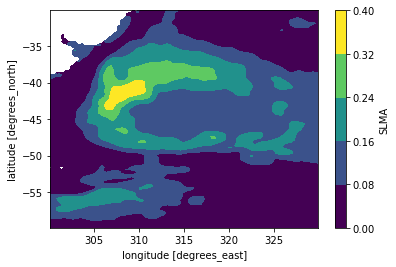

In [22]:
# OBS - SLMA
aviso_file = '/g/data3/hh5/tmp/cosima/observations/original/AVISO_Mean_Std/aviso_ssh_monthly_anom_clim9314_GMSLtrend_removed.timstd.nc'
sea_level_obs = xr.open_dataset(aviso_file).SLMA.mean('TAXM')
sea_level_obs_bc = sea_level_obs.sel(LAT=slice(reg[0],reg[1])).sel(LON=slice(reg[2]+360,reg[3]+360)) 
sea_level_obs_bc.plot.contourf()

# OBS: drifter velocities (Laurindo et al., 2017)
obs_file = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/drifter_annualmeans.nc').\
           rename({'Lat':'latitude','Lon':'longitude'})
obs_u = obs_file['U']
obs_v = obs_file['V']
obs_vel = np.sqrt(obs_u**2+obs_v**2)
obs_vel_bc = obs_vel.sel(latitude=slice(reg[0],reg[1])).sel(longitude=slice(reg[2],reg[3])) 

# EKE
# EKEobs = xr.open_dataset('/g/data/w97/gsp599/cosima-recipes-master/Tutorials/meanEKE.nc')
EKEobs = xr.open_dataset('meanEKE.nc')

#plt.contourf(EKEobs.X,EKEobs.Y,EKEobs.meanEKE)



## The following is from BarotropicStreamfunction.ipynb

In [23]:
def get_gyre_psi(ekey):
    
    expt = exptdata.exptdict[ekey]['expt']
    n_files = exptdata.exptdict[ekey]['n_files']
    time_units = exptdata.exptdict[ekey]['time_units']
    offset = exptdata.exptdict[ekey]['offset']
    
    cntrl_tx_trans = cc.get_nc_variable(expt,'ocean_month.nc','tx_trans_int_z',use_cache=True,
                                        n=n_files,time_units=time_units, offset=offset)\
                                        .sel(time=slice(tstart,tend))\
                                        .mean('time')
    # convert from kg/s to Sv, assuming typical density of 1036kg/m^3 (underestimates deep ocean)
    cntrl_psi = cntrl_tx_trans.cumsum('yt_ocean')/1e6/1036
    #now find DP transport to subtract for the NAtl psi - see Rong
    cntrl_dp_ts = cntrl_psi.sel(xu_ocean=0,method='nearest').sel(yt_ocean=20,method='nearest')
    gyre_psi = -cntrl_psi+cntrl_dp_ts

    # write to disk
#     gyre_psi.to_netcdf(NOSYNC + expt + '_gyre_psi_' + yearrange +'.nc')
    
    return gyre_psi

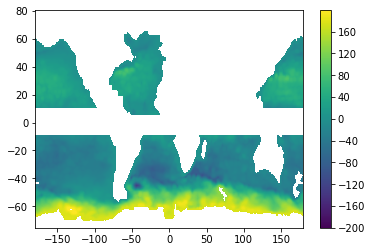

In [24]:
data=loadmat('/g/data3/hh5/tmp/cosima/observations/original/psi_barotropic.mat')
lon = data['lon_p'][0,:]
lat = data['lat_p'][0,:]
psi = data['psi']/1e6 # in Sv
plt.contourf(lon,lat,psi,levels=np.arange(-200,200)) #,cmap = cm.cm.balance)
plt.colorbar()

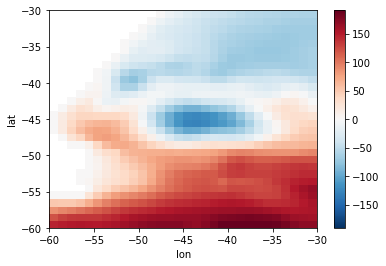

In [25]:
psida = xr.DataArray(psi, coords=[('lat', lat), ('lon', lon)])\
    .sel(lat=slice(reg[0],reg[1])).sel(lon=slice(reg[2],reg[3]))
psida.plot()

In [26]:
# General plotting stuff
plot_labels=['(a) ','(b) ','(c) ','(d)']
land_50m = cft.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)
# cmp = plt.get_cmap('gist_ncar_r')  # confusing with the most common form of colourblindness (deuteranomaly)
cmp = plt.get_cmap('nipy_spectral')

In [27]:
# %%time
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
sea_level = cc.get_nc_variable(expt,'ocean_month.nc','sea_level',use_cache=True,
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend)).mean('time')
    
sea_levelsq = cc.get_nc_variable(expt,'ocean_month.nc','sea_levelsq',use_cache=True,
                                 n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend)).mean('time')
sla_rms_1deg = (sea_levelsq - sea_level**(2.0))**(0.5)
# sla_rms_1deg.load()

Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean_month.nc_sea_level_-12_days-since-1718-01-01_-87658_False.pkl
Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean_month.nc_sea_levelsq_-12_days-since-1718-01-01_-87658_False.pkl


In [28]:
# %%time
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
sea_level = cc.get_nc_variable(expt,'ocean_month.nc','sea_level',use_cache=True,
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend)).mean('time')
    
sea_levelsq = cc.get_nc_variable(expt,'ocean_month.nc','sea_levelsq',use_cache=True,
                                 n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend)).mean('time')
sla_rms_025deg = (sea_levelsq - sea_level**(2.0))**(0.5)
# sla_rms_025deg.load()

Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean_month.nc_sea_level_-34_days-since-1718-01-01_-87658_False.pkl
Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean_month.nc_sea_levelsq_-34_days-since-1718-01-01_-87658_False.pkl


In [29]:
# %%time
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

chunks={'xt_ocean': 400, 'yt_ocean': 300}

sea_level = cc.get_nc_variable(expt,'ocean_daily.nc','eta_t',use_cache=True,
                               n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend)).mean('time')
    
sea_levelsq = cc.get_nc_variable(expt,'ocean_month.nc','sea_levelsq',use_cache=True,
                                 n=n_files,time_units=time_units, offset=offset)\
                                 .sel(time=slice(exptdata.clim_tstart,exptdata.clim_tend)).mean('time')
sla_rms_01deg = (sea_levelsq - sea_level**(2.0))**(0.5)
# sla_rms_01deg.load()

Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_daily.nc_eta_t_None_days-since-0001-01-01_None_False.pkl
Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_month.nc_sea_levelsq_None_days-since-0001-01-01_None_False.pkl


In [30]:
aviso_file = '/g/data3/hh5/tmp/cosima/observations/original/AVISO_Mean_Std/aviso_ssh_monthly_anom_clim9314_GMSLtrend_removed.timstd.nc'
SLMA = xr.open_dataset(aviso_file).SLMA.mean('TAXM')
SLMA = SLMA.assign_coords(LON=SLMA.LON-360)  # shift to match MOM coords (at least in this region)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [31]:
gyre_psi_1deg = get_gyre_psi('1deg')
gyre_psi_025deg = get_gyre_psi('025deg')
gyre_psi_01deg = get_gyre_psi('01deg')

Reading from cache file cache_get_nc_variable_1deg_jra55v13_iaf_spinup1_B1_ocean_month.nc_tx_trans_int_z_-12_days-since-1718-01-01_-87658_False.pkl
Reading from cache file cache_get_nc_variable_025deg_jra55v13_iaf_gmredi6_ocean_month.nc_tx_trans_int_z_-34_days-since-1718-01-01_-87658_False.pkl
Reading from cache file cache_get_nc_variable_01deg_jra55v13_iaf_ocean_month.nc_tx_trans_int_z_None_days-since-0001-01-01_None_False.pkl


In [32]:
## All data is now loaded - make a dictionary for plotting
gyre_psi_dict = {'1deg': gyre_psi_1deg, '025deg': gyre_psi_025deg, '01deg': gyre_psi_01deg}
sla_rms_dict = {'1deg': sla_rms_1deg, '025deg': sla_rms_025deg, '01deg': sla_rms_01deg}
# # FOR TESTING - FIX THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# gyre_psi_dict = {'1deg': gyre_psi_1deg, '025deg': gyre_psi_1deg, '01deg': gyre_psi_1deg}
# sla_rms_dict = {'1deg': sla_rms_1deg, '025deg': sla_rms_1deg, '01deg': sla_rms_1deg}
# # gyre_psi_dict = {'1deg': gyre_psi_1deg} #, '025deg': gyre_psi_025deg, '01deg': gyre_psi_01deg}
# # sla_rms_dict = {'1deg': sla_rms_1deg} #, '025deg': sla_rms_025deg, '01deg': sla_rms_01deg}

## The above is from BarotropicStreamfunction.ipynb

1deg
025deg
01deg


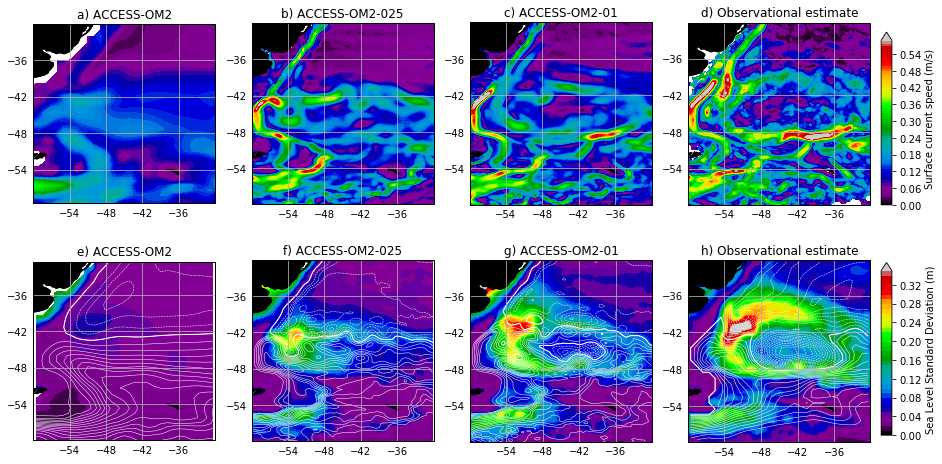

In [34]:
# Plotting with SLA variance instead of EKE
ftszSLA = 12
ftszTITLE = 12

plt.figure(figsize=(15,8))
cmp = plt.get_cmap('nipy_spectral') #('rainbow')
cmp2 = plt.get_cmap('nipy_spectral')
clev1 = np.arange(0,0.6,0.01)
#clev2 = np.arange(0,0.3,0.01)
clev2 = np.arange(0,1500,10)

clev3 = np.arange(0,0.351,0.01)
clev4 = np.arange(-150,150.01,10)


land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='black',linewidth=0.5)

sub1 = [1,2,3,4]
sub2 = [5,6,7,8]
flvel = ['vel_mean_1deg','vel_mean_025deg','vel_mean_01deg','obs_vel_bc']
#flsla = ['sla_rms_1deg','sla_rms_025deg','sla_rms_01deg','sea_level_obs_bc']
flsla = ['EKE_mean_1deg','EKE_mean_025deg','EKE_mean_01deg','EKEobs.meanEKE']
tit1 = ['a) ACCESS-OM2','b) ACCESS-OM2-025','c) ACCESS-OM2-01','d) Observational estimate']
tit2 = ['e) ACCESS-OM2','f) ACCESS-OM2-025','g) ACCESS-OM2-01','h) Observational estimate']
LEVELS = ([1,2],[30,100],[200,600],[600,1200])

for ii in range(3): #[0,1,2]:
    ekey = list(exptdata.exptdict.keys())[ii]
    print(ekey)
    # Surf Curr
    ax = plt.subplot(2,4,sub1[ii],projection=ccrs.PlateCarree(central_longitude=-100))
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    gl = ax.gridlines(draw_labels=False)
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    p2 = eval(flvel[ii]).plot.contourf(cmap=cmp,levels=clev1,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
    plt.title(tit1[ii])
    # SLA std
    sla_rms = sla_rms_dict[ekey].sel(yt_ocean=slice(reg[0],reg[1])).sel(xt_ocean=slice(reg[2],reg[3]))
    gyre_psi = gyre_psi_dict[ekey].sel(yt_ocean=slice(reg[0],reg[1])).sel(xu_ocean=slice(reg[2],reg[3]))
    ax = plt.subplot(2,4,sub2[ii],projection=ccrs.PlateCarree(central_longitude=-100))
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    gl = ax.gridlines(draw_labels=False)
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    p2=sla_rms.plot.contourf(cmap=cmp2, levels=clev3, extend='max', 
                              add_colorbar=False, transform=ccrs.PlateCarree()) 
    p2.cmap.set_over(color=cmp(255), alpha=None)
    gyre_psi.plot.contour(levels=clev4,colors='w',linewidths=0.5,transform=ccrs.PlateCarree())
    gyre_psi.plot.contour(levels=[0.0,],colors='w',linewidths=1.0,transform=ccrs.PlateCarree())

#     p2 = eval(flsla[ii]).plot.contourf(cmap=cmp,levels=clev2,add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
#     p3 = eval(flsla[ii]).plot.contour(colors='k',levels=LEVELS[ii],add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
#     plt.clabel(p3, inline=True, fmt='%1.0f', fontsize=ftszSLA, colors='k')
    plt.title(tit2[ii])

# Surf Curr from drifters
ax = plt.subplot(2,4,4,projection=ccrs.PlateCarree(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
gl.xlabels_bottom = True
gl.ylabels_left = True
p1 = swapaxes(obs_vel_bc,0,1).plot.contourf(cmap=cmp,levels=clev1,add_colorbar=False,extend='max',transform=ccrs.PlateCarree())
p1.cmap.set_over(color=cmp(255), alpha=None)
plt.title(tit1[3])

ax1 = plt.axes([0.91,0.55,0.01,0.3])
cb = plt.colorbar(p1,cax=ax1,orientation='vertical',pad=.05)
cb.ax.set_ylabel('Surface current speed (m/s)')

# AVISO EKE
ax = plt.subplot(2,4,8,projection=ccrs.PlateCarree(central_longitude=-100))
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
gl = ax.gridlines(draw_labels=False)
gl.xlabels_bottom = True
gl.ylabels_left = True
# TODO: fix from here down
p2=SLMA.sel(LAT=slice(reg[0],reg[1])).sel(LON=slice(reg[2],reg[3]))\
    .plot.contourf(cmap=cmp2, levels=clev3, extend='max', 
                      add_colorbar=False, transform=ccrs.PlateCarree()) 
p2.cmap.set_over(color=cmp2(255), alpha=None)
# plt.contour(lon,lat,psi,levels=clev4,colors='w',linewidths=0.5,transform=ccrs.PlateCarree())
# plt.contour(lon,lat,psi,levels=[0.0,],colors='w',linewidths=1.0,transform=ccrs.PlateCarree())
psida.plot.contour(levels=clev4,colors='w',linewidths=0.5,transform=ccrs.PlateCarree())
psida.plot.contour(levels=[0.0,],colors='w',linewidths=1.0,transform=ccrs.PlateCarree())
plt.title(tit2[3])

ax2 = plt.axes([0.91,0.15,0.01,0.3])
cb = plt.colorbar(p2,cax=ax2,orientation='vertical',pad=.05)
#cb.ax.set_ylabel('Sea Level std [m]')
cb.ax.set_ylabel('Sea Level Standard Deviation (m)')


# figdir = '/g/data/w97/gsp599/figures/'
figdir = ''
figname = 'SW_Atlantic_cosima_SLAstdev'
plt.savefig(os.path.join(figdir, figname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
  
